In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt, lines as mlines, markers as mmarkers, patches as mpatches, cm

In [2]:
tracts1990 = gpd.read_file("../data/tracts1990.geojson").to_crs("EPSG:26916")
tracts2000 = gpd.read_file("../data/tracts2000.geojson").to_crs("EPSG:26916")
tracts2010 = gpd.read_file("../data/tracts2010.geojson").to_crs("EPSG:26916")
tracts2020 = gpd.read_file("../data/tracts2020.geojson").to_crs("EPSG:26916")
chicagoborder = gpd.read_file("../data/chicago_border.geojson").to_crs("EPSG:26916")
tif = gpd.read_file("../data/alltif.geojson").to_crs("EPSG:26916")

AttributeError: 'Figure' object has no attribute 'save'

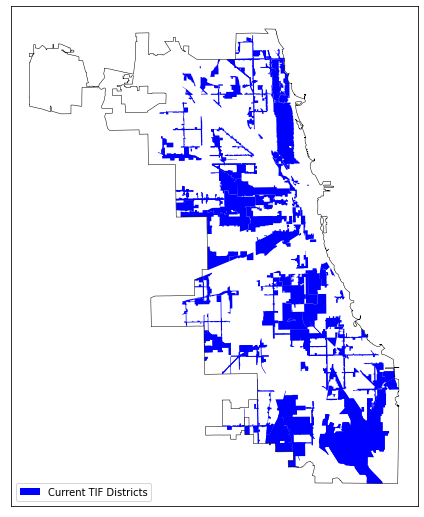

In [3]:
fig, ax = plt.subplots(figsize=(6, 8), layout="tight")

ax.set_xticks([])
ax.set_yticks([])

chicagoborder.boundary.plot(ax=ax, edgecolor="black", linewidth=0.5)
tif.loc[tif['EXPIRATION_YEAR'] > 2021].plot(ax=ax, color="blue")
handle = mpatches.Rectangle((0, 0), 1, 1, fc="blue", label="Current TIF Districts")
ax.legend(handles=[handle], loc=3)

fig.save("../results/current_tif_districts.png")

In [ ]:
by_third_1990 = tracts1990.pivot_table(index="WHITE_PROPORTION_THIRD",\
                                        values=["TOTAL_SPENT"], aggfunc=[np.sum])
by_third_2000 = tracts2000.pivot_table(index="WHITE_PROPORTION_THIRD",\
                                        values=["TOTAL_SPENT"], aggfunc=[np.sum])
by_third_2010 = tracts2010.pivot_table(index="WHITE_PROPORTION_THIRD",\
                                        values=["TOTAL_SPENT"], aggfunc=[np.sum])

In [ ]:
by_third_1990 = by_third_1990.droplevel(0, axis=1)
by_third_2000 = by_third_2000.droplevel(0, axis=1)
by_third_2010 = by_third_2010.droplevel(0, axis=1)

In [ ]:
by_thirds = by_third_1990.merge(by_third_2000, \
                                on="WHITE_PROPORTION_THIRD", suffixes=("_90s", "_00s"))

In [ ]:
by_thirds = by_thirds.merge(by_third_2010, \
                            on="WHITE_PROPORTION_THIRD", suffixes=("", "_10s"))

In [ ]:
by_thirds.rename(inplace=True, columns={"TOTAL_SPENT_90s": "1990s",\
                                        "TOTAL_SPENT_00s": "2000s", "TOTAL_SPENT": "2010s"})

In [ ]:
by_thirds

In [ ]:
new_df = {}

for idx, row in by_thirds.iterrows():
    new_df[idx] = row.values

In [ ]:
new_df = pd.DataFrame(new_df, index=by_thirds.columns.tolist())

In [ ]:
new_df.plot(kind="bar", rot=0)

In [ ]:
tracts2010.head()

In [ ]:
tracts2010['GENTRIFIED_IND'] = np.where(tracts2010['GENTRIFIED'], 1, 0)
tracts2010['IN_TIF_DISTRICT_IND'] = np.where(tracts2010['IN_TIF_DISTRICT'], 1, 0)
tracts2010['PER_CAPITA_SPENDING'] = tracts2010['TOTAL_SPENT']/ tracts2010['TOTAL']

X = tracts2010.loc[tracts2010['CANDIDATE'] == True, "TOTAL"].to_numpy().reshape(-1,1)
Y = tracts2010.loc[tracts2010['CANDIDATE'] == True, "GENTRIFIED_IND"].to_numpy().reshape(-1, 1)

# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(X, Y)  # perform linear regression
# Y_pred = linear_regressor.predict(X)  # make predictions

In [ ]:
tracts2010['T']

In [ ]:
X